<a href="https://colab.research.google.com/github/Pedro-Prestes/learning/blob/master/Talis_2018_professor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Talis 2018 - Anáálise de dados do ensino-aprendizagem - INEP

In [78]:
# Análise dos dados educacionais - São dados do INEP disponibilizados por meio de API
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
%matplotlib inline
!pip3 install bokeh

#url = 'http://educacao.dadosabertosbr.com/api/escolas/buscaavancada?situacaoFuncionamento=1&energiaInexistente=on&aguaInexistente=on&esgotoInexistente=on&cozinha=on'

In [79]:
#resposta = rq.get(url)
Talis2018 = pd.read_csv('/content/drive/My Drive/Microdados_Talis_2018/microdados_talis_2018.zip (Unzipped Files)/talis_br_2018_microdados_div_publica.zip (Unzipped Files)/TALIS 2018/DADOS/TALIS_BR_2018_MICRODADOS.zip (Unzipped Files)/CCGBRAT3.CSV')
Talis2018.head()

IDSCHOOL  PISASCHOOLID IDLANG  IDCNTRY  ... T3PLACPE  T3PWLOAD   IEADATE VERSION
0      5001           NaN     61       76  ...        2  10.14155  20190603      36
1      5002           NaN     61       76  ...        2  10.11171  20190603      36
2      5003           NaN     61       76  ...        2  13.24500  20190603      36
3      5004           NaN     61       76  ...        2  13.20139  20190603      36
4      5005           NaN     61       76  ...        1  13.30698  20190603      36

[5 rows x 267 columns]

In [80]:
Talis2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Columns: 267 entries, IDSCHOOL to VERSION
dtypes: float64(102), int64(10), object(155)
memory usage: 392.3+ KB


In [81]:
Talis2018.dtypes

IDSCHOOL          int64
PISASCHOOLID    float64
IDLANG           object
IDCNTRY           int64
CNTRY            object
                 ...   
T3PAUTC          object
T3PLACPE         object
T3PWLOAD         object
IEADATE           int64
VERSION           int64
Length: 267, dtype: object

In [82]:
Talis2018.shape

(188, 267)

In [83]:
Talis2018['CNTRY'].value_counts()

BRA    188
Name: CNTRY, dtype: int64

In [84]:
Talis2018['IDSCHOOL'].value_counts()

5119    1
5178    1
5187    1
5186    1
5185    1
       ..
5054    1
5053    1
5052    1
5051    1
5120    1
Name: IDSCHOOL, Length: 188, dtype: int64

In [85]:
print(Talis2018.shape)
print(Talis2018)

(188, 267)
     IDSCHOOL  PISASCHOOLID IDLANG  ...  T3PWLOAD   IEADATE  VERSION
0        5001           NaN     61  ...  10.14155  20190603       36
1        5002           NaN     61  ...  10.11171  20190603       36
2        5003           NaN     61  ...  13.24500  20190603       36
3        5004           NaN     61  ...  13.20139  20190603       36
4        5005           NaN     61  ...  13.30698  20190603       36
..        ...           ...    ...  ...       ...       ...      ...
183      5186           NaN     61  ...  13.27485  20190603       36
184      5187           NaN     61  ...  10.13237  20190603       36
185      5188           NaN     61  ...   6.99908  20190603       36
186      5189           NaN     61  ...  10.08876  20190603       36
187      5190           NaN     61  ...  10.14155  20190603       36

[188 rows x 267 columns]


In [86]:
Talis2018.head()

IDSCHOOL  PISASCHOOLID IDLANG  IDCNTRY  ... T3PLACPE  T3PWLOAD   IEADATE VERSION
0      5001           NaN     61       76  ...        2  10.14155  20190603      36
1      5002           NaN     61       76  ...        2  10.11171  20190603      36
2      5003           NaN     61       76  ...        2  13.24500  20190603      36
3      5004           NaN     61       76  ...        2  13.20139  20190603      36
4      5005           NaN     61       76  ...        1  13.30698  20190603      36

[5 rows x 267 columns]

In [87]:
Talis2018_1 = Talis2018[['IDSCHOOL','TC3G01','TC3G03','TC3G04A','TC3G04B','TC3G04C','TC3G04D','TC3G04E','TC3G05','TC3G06A','TC3G06B','TC3G06C','TC3G07A','TC3G07B','TC3G07C','TC3G07H']]

In [88]:
Talis2018_1.head()

IDSCHOOL TC3G01 TC3G03 TC3G04A  ... TC3G07A TC3G07B TC3G07C TC3G07H
0      5001      1      5       5  ...       1       1       1       2
1      5002      1      5      17  ...       1       1       2       2
2      5003      2      5       2  ...       1       2       1       2
3      5004      1      5       1  ...       1       2       1       2
4      5005      1      5       1  ...       1       2       2       2

[5 rows x 16 columns]

In [89]:
Talis2018_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   IDSCHOOL  188 non-null    int64 
 1   TC3G01    186 non-null    object
 2   TC3G03    186 non-null    object
 3   TC3G04A   187 non-null    object
 4   TC3G04B   187 non-null    object
 5   TC3G04C   187 non-null    object
 6   TC3G04D   186 non-null    object
 7   TC3G04E   187 non-null    object
 8   TC3G05    187 non-null    object
 9   TC3G06A   186 non-null    object
 10  TC3G06B   183 non-null    object
 11  TC3G06C   185 non-null    object
 12  TC3G07A   185 non-null    object
 13  TC3G07B   184 non-null    object
 14  TC3G07C   186 non-null    object
 15  TC3G07H   187 non-null    object
dtypes: int64(1), object(15)
memory usage: 23.6+ KB


In [90]:
Talis2018_1 = Talis2018_1.set_index('IDSCHOOL')

In [91]:
Talis2018_1.head()

TC3G01 TC3G03 TC3G04A TC3G04B  ... TC3G07A TC3G07B TC3G07C TC3G07H
IDSCHOOL                                ...                                
5001          1      5       5       5  ...       1       1       1       2
5002          1      5      17      17  ...       1       1       2       2
5003          2      5       2       2  ...       1       2       1       2
5004          1      5       1       1  ...       1       2       1       2
5005          1      5       1       1  ...       1       2       2       2

[5 rows x 15 columns]

In [92]:
Talis2018_1.isnull()

TC3G01  TC3G03  TC3G04A  TC3G04B  ...  TC3G07A  TC3G07B  TC3G07C  TC3G07H
IDSCHOOL                                    ...                                    
5001       False   False    False    False  ...    False    False    False    False
5002       False   False    False    False  ...    False    False    False    False
5003       False   False    False    False  ...    False    False    False    False
5004       False   False    False    False  ...    False    False    False    False
5005       False   False    False    False  ...    False    False    False    False
...          ...     ...      ...      ...  ...      ...      ...      ...      ...
5186       False   False    False    False  ...    False    False    False    False
5187       False   False    False    False  ...    False    False    False    False
5188       False   False    False    False  ...    False    False    False    False
5189       False   False    False    False  ...    False    False    False    False
5190       False   False    False    False  ...    False    False    False    False

[188 rows x 15 columns]

In [98]:
Talis2018_1.dropna(inplace=True)

In [99]:
Talis2018_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 5001 to 5190
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TC3G01   176 non-null    object
 1   TC3G03   176 non-null    object
 2   TC3G04A  176 non-null    object
 3   TC3G04B  176 non-null    object
 4   TC3G04C  176 non-null    object
 5   TC3G04D  176 non-null    object
 6   TC3G04E  176 non-null    object
 7   TC3G05   176 non-null    object
 8   TC3G06A  176 non-null    object
 9   TC3G06B  176 non-null    object
 10  TC3G06C  176 non-null    object
 11  TC3G07A  176 non-null    object
 12  TC3G07B  176 non-null    object
 13  TC3G07C  176 non-null    object
 14  TC3G07H  176 non-null    object
dtypes: object(15)
memory usage: 22.0+ KB


In [100]:
Talis2018_1.columns.values

array(['TC3G01', 'TC3G03', 'TC3G04A', 'TC3G04B', 'TC3G04C', 'TC3G04D',
       'TC3G04E', 'TC3G05', 'TC3G06A', 'TC3G06B', 'TC3G06C', 'TC3G07A',
       'TC3G07B', 'TC3G07C', 'TC3G07H'], dtype=object)

In [104]:
Talis2018_1.duplicated()

IDSCHOOL
5001    False
5002    False
5003    False
5004    False
5005    False
        ...  
5186    False
5187    False
5188    False
5189    False
5190    False
Length: 176, dtype: bool

In [105]:
Talis2018_1.columns.values

array(['TC3G01', 'TC3G03', 'TC3G04A', 'TC3G04B', 'TC3G04C', 'TC3G04D',
       'TC3G04E', 'TC3G05', 'TC3G06A', 'TC3G06B', 'TC3G06C', 'TC3G07A',
       'TC3G07B', 'TC3G07C', 'TC3G07H'], dtype=object)

In [110]:
Talis2018_1.dtypes

TC3G01     object
TC3G03     object
TC3G04A    object
TC3G04B    object
TC3G04C    object
TC3G04D    object
TC3G04E    object
TC3G05     object
TC3G06A    object
TC3G06B    object
TC3G06C    object
TC3G07A    object
TC3G07B    object
TC3G07C    object
TC3G07H    object
dtype: object

In [147]:
def coerce_df_columns_to_numeric(Talis2018_1, column_list):
    Talis2018_1[column_list] = Talis2018_1[column_list].apply(pd.to_numeric, errors='coerce')

In [148]:
Talis2018_1.astype('category')

TC3G01 TC3G03 TC3G04A TC3G04B  ... TC3G07A TC3G07B TC3G07C TC3G07H
IDSCHOOL                                ...                                
5001          0      1      23      31  ...       0       0       0       1
5002          0      1       8       9  ...       0       0       1       1
5003          1      1      11      12  ...       0       1       0       1
5004          0      1       1       1  ...       0       1       0       1
5005          0      1       1       1  ...       0       1       1       1
...         ...    ...     ...     ...  ...     ...     ...     ...     ...
5186          0      1      23      31  ...       0       0       0       1
5187          1      1       2      33  ...       0       0       0       1
5188          0      1      17      19  ...       0       0       0       1
5189          1      2       1       1  ...       0       1       0       1
5190          1      1      18      21  ...       0       0       0       0

[176 rows x 15 columns]

In [146]:
for col_name in Talis2018_1.columns:
    if(Talis2018_1[col_name].dtype == 'object'):
        Talis2018_1[col_name]= Talis2018_1[col_name].astype('category')
        Talis2018_1[col_name] = Talis2018_1[col_name].cat.codes

In [149]:
Talis2018_1.dtypes

TC3G01     int8
TC3G03     int8
TC3G04A    int8
TC3G04B    int8
TC3G04C    int8
TC3G04D    int8
TC3G04E    int8
TC3G05     int8
TC3G06A    int8
TC3G06B    int8
TC3G06C    int8
TC3G07A    int8
TC3G07B    int8
TC3G07C    int8
TC3G07H    int8
dtype: object

In [150]:
Talis2018_1.corr(method='pearson')

TC3G01    TC3G03   TC3G04A  ...   TC3G07B   TC3G07C   TC3G07H
TC3G01   1.000000  0.293731 -0.056181  ...  0.087761  0.035525 -0.057591
TC3G03   0.293731  1.000000 -0.002828  ...  0.097784  0.055512  0.023756
TC3G04A -0.056181 -0.002828  1.000000  ... -0.057003 -0.124062 -0.034824
TC3G04B  0.005617  0.078957  0.549159  ... -0.165660 -0.165513 -0.006580
TC3G04C  0.099137  0.124288  0.140980  ... -0.044659 -0.062318 -0.039484
TC3G04D  0.093250  0.064778  0.048310  ... -0.069925  0.008800 -0.128690
TC3G04E  0.125047  0.063893 -0.035257  ...  0.096536  0.149218 -0.069249
TC3G05  -0.033508  0.064502  0.077037  ...  0.124969  0.198400  0.161626
TC3G06A  0.244401  0.141427 -0.178143  ...  0.173692  0.168881  0.090594
TC3G06B  0.108956  0.020339 -0.086540  ...  0.013126  0.189831 -0.020118
TC3G06C  0.135308  0.066754 -0.075829  ...  0.119135  0.227783 -0.064898
TC3G07A  0.072932  0.120506 -0.025485  ...  0.342944  0.544502  0.218562
TC3G07B  0.087761  0.097784 -0.057003  ...  1.000000  0.456604  0.228003
TC3G07C  0.035525  0.055512 -0.124062  ...  0.456604  1.000000  0.272743
TC3G07H -0.057591  0.023756 -0.034824  ...  0.228003  0.272743  1.000000

[15 rows x 15 columns]

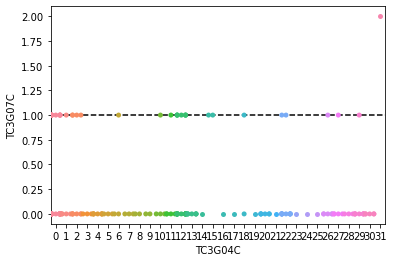

In [151]:
sns.swarmplot(data=Talis2018_1, x='TC3G04C', y='TC3G07C')
plt.axhline(1.0, color='black', linestyle='--')

In [152]:
# Calcule a correlação  
correlacoes = Talis2018_1.corr()

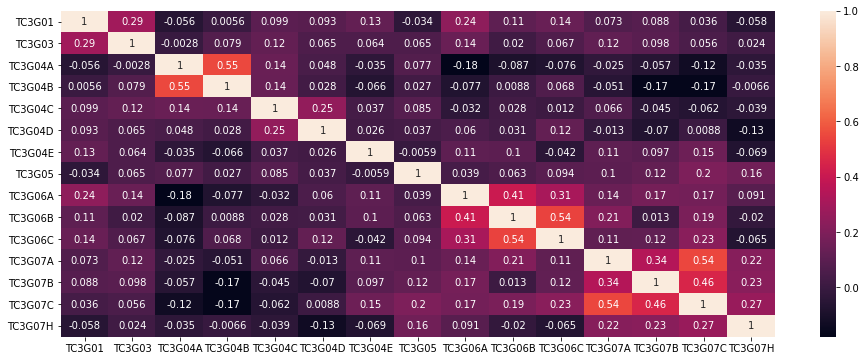

In [153]:
# Usando o método heatmap do seaborn
plt.figure(figsize=(16, 6))
sns.heatmap(data=correlacoes, annot=True)

In [156]:
# Apenas uma amostragem por acionamento mecânico, contudo vale apena automatizar como demonstrado acima.
Talis2018_1['TC3G07A'].corr(Talis2018_1['TC3G07C'])

0.5445022437041949

In [158]:
X = Talis2018_1.drop(['TC3G07A'], axis=1)
y = Talis2018_1['TC3G07A']

In [159]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
f_classif = SelectKBest(score_func=f_classif, k=4)
fit = f_classif.fit(X,y)
features = fit.transform(X)

# Visualizando as features:
print(features)

[[1 1 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [1 1 1 0]
 [1 3 1 1]
 [1 1 1 1]
 [1 1 0 0]
 [1 0 1 1]
 [1 0 0 0]
 [1 2 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 0 0 1]
 [1 0 0 0]
 [1 0 0 0]
 [1 1 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [2 1 1 0]
 [2 0 0 0]
 [1 0 0 0]
 [4 4 2 2]
 [1 0 0 0]
 [1 1 0 0]
 [1 0 0 0]
 [1 2 0 0]
 [2 0 0 0]
 [1 0 0 1]
 [1 3 1 0]
 [1 0 0 0]
 [1 1 0 0]
 [1 0 0 0]
 [1 2 0 0]
 [1 0 0 0]
 [3 0 0 0]
 [1 1 0 0]
 [1 2 1 1]
 [1 0 1 0]
 [2 0 1 0]
 [2 0 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [3 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 1 1]
 [2 0 0 0]
 [1 1 1 1]
 [1 0 0 0]
 [2 2 0 0]
 [1 0 1 1]
 [1 0 0 0]
 [1 3 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [2 1 0 0]
 [1 0 1 0]
 [1 0 1 0]
 [2 0 0 0]
 [1 0 1 0]
 [1 0 0 0]
 [1 0 1 1]
 [1 0 1 0]
 [1 0 0 0]
 [2 2 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 3 0 0]
 [1 0 0 0]
 [1 0 1 1]
 [1 3 1 1]
 [3 2 0 0]
 [1 1 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [2 0 0 0]
 [1 2 0 1]
 [1 0 0 0]
 [1 1 1 0]
 [1 0 1 0]
 [1 0 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 0 0 0]
 [1 0 1 0]
 [1 0 0 0]
 [1 3 0 0]
 [1 1 1 1]
 [1 2 0 0]

In [160]:
cols = fit.get_support(indices=True)
Talis2018_1.iloc[:,cols]

TC3G03  TC3G05  TC3G07A  TC3G07B
IDSCHOOL                                  
5001           1       1        0        0
5002           1       0        0        0
5003           1       0        0        1
5004           1       1        0        1
5005           1       3        0        1
...          ...     ...      ...      ...
5186           1       2        0        0
5187           1       0        0        0
5188           1       3        0        0
5189           2       0        0        1
5190           1       0        0        0

[176 rows x 4 columns]

In [161]:
#features categóricas ou variável alvo categórica
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [162]:
# feature extraction
test = SelectKBest(chi2, k=4)

In [163]:
fit = test.fit(X, y)

In [164]:
fit.get_support(indices=True)

array([ 3,  4,  6, 12])

In [165]:
features = fit.transform(X)

In [166]:
# Visualizando as features:
print(features)

[[31 29  0  0]
 [ 9  2  0  1]
 [12  0  2  0]
 [ 1  8 11  0]
 [ 1 12  0  1]
 [31 12 12  1]
 [ 7  0 18  0]
 [12 22 13  1]
 [12 29  0  0]
 [27 13 22  0]
 [ 0 29  0  0]
 [ 2  0  0  0]
 [33  0  0  0]
 [ 7 15  8  1]
 [12 11 10  0]
 [ 1 12  7  0]
 [10 12  1  0]
 [12  4  0  0]
 [ 2 22  4  0]
 [ 1  0  3  0]
 [ 1 22  7  0]
 [12  2 18  0]
 [37 31 29  2]
 [31  2 10  0]
 [27  1 24  0]
 [34 13  0  0]
 [31 10 10  0]
 [31 20 14  0]
 [12  1  0  1]
 [36 10  0  0]
 [36  3 13  0]
 [ 6  0  0  0]
 [ 0  0  7  0]
 [27 12  8  0]
 [12 26  1  0]
 [13 26 18  0]
 [12  0  0  0]
 [14 10 24  1]
 [21  0  2  0]
 [12  0 25  0]
 [ 7 28  0  0]
 [34 30  6  0]
 [12 30 10  0]
 [22  0  0  0]
 [31 13  0  0]
 [ 7 20  2  0]
 [ 0 15  0  1]
 [27  0  0  0]
 [27 11  0  1]
 [32  2  0  0]
 [31 13  0  0]
 [13  6  0  1]
 [17  1  0  0]
 [29 24  0  0]
 [21 26 11  0]
 [34 29  2  0]
 [ 6 27 18  0]
 [ 3  0  0  0]
 [ 1  0 27  0]
 [15  0 22  0]
 [11 11 16  0]
 [ 4  0 15  0]
 [ 1  0  7  1]
 [21  6 10  0]
 [19 23  0  0]
 [21 13  0  0]
 [23 20 22

In [167]:
cols = fit.get_support(indices=True)
Talis2018_1.iloc[:, cols]

TC3G04B  TC3G04C  TC3G04E  TC3G07B
IDSCHOOL                                    
5001           31       29        0        0
5002            9        2        0        0
5003           12        0        2        1
5004            1        8       11        1
5005            1       12        0        1
...           ...      ...      ...      ...
5186           31        4        0        0
5187           33        0       10        0
5188           19       19        0        0
5189            1        0        4        1
5190           21        0        0        0

[176 rows x 4 columns]

In [168]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
from sklearn.feature_selection import RFE
rfe = RFE(model, 4)
fit = rfe.fit(X, y)

In [169]:
# Mostrando o número de features:
print ("Número de features: {}".format(fit.n_features_))  

Número de features: 4


In [170]:
# Visualizando os índices:
cols = fit.get_support(indices=True)
Talis2018_1.iloc[:,cols]

TC3G03  TC3G05  TC3G07A  TC3G07B
IDSCHOOL                                  
5001           1       1        0        0
5002           1       0        0        0
5003           1       0        0        1
5004           1       1        0        1
5005           1       3        0        1
...          ...     ...      ...      ...
5186           1       2        0        0
5187           1       0        0        0
5188           1       3        0        0
5189           2       0        0        1
5190           1       0        0        0

[176 rows x 4 columns]

In [171]:
from sklearn.ensemble import RandomForestClassifier

In [172]:
# feature extraction
model = RandomForestClassifier(n_estimators=10)
model.fit(X, y)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [173]:
# Score de cada um dos atributos:
print(model.feature_importances_)

[0.00551555 0.01639759 0.06074785 0.09506087 0.07728651 0.15154826
 0.09439341 0.05471508 0.06928132 0.09093411 0.04042917 0.03786818
 0.16944004 0.03638206]


In [174]:
# Nome das colunas:
Talis2018_1

TC3G01  TC3G03  TC3G04A  TC3G04B  ...  TC3G07A  TC3G07B  TC3G07C  TC3G07H
IDSCHOOL                                    ...                                    
5001           0       1       23       31  ...        0        0        0        1
5002           0       1        8        9  ...        0        0        1        1
5003           1       1       11       12  ...        0        1        0        1
5004           0       1        1        1  ...        0        1        0        1
5005           0       1        1        1  ...        0        1        1        1
...          ...     ...      ...      ...  ...      ...      ...      ...      ...
5186           0       1       23       31  ...        0        0        0        1
5187           1       1        2       33  ...        0        0        0        1
5188           0       1       17       19  ...        0        0        0        1
5189           1       2        1        1  ...        0        1        0        1
5190           1       1       18       21  ...        0        0        0        0

[176 rows x 15 columns]

In [175]:
# Criando um Dataframe com as colunas e seus scores:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

importance
TC3G07C    0.169440
TC3G04D    0.151548
TC3G04B    0.095061
TC3G04E    0.094393
TC3G06B    0.090934
TC3G04C    0.077287
TC3G06A    0.069281
TC3G04A    0.060748
TC3G05     0.054715
TC3G06C    0.040429
TC3G07B    0.037868
TC3G07H    0.036382
TC3G03     0.016398
TC3G01     0.005516

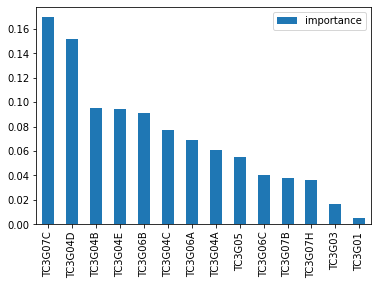

In [176]:
# Visualizando as importâncias de forma gráfica:
feature_importances.plot(kind='bar')

In [177]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
  ('feature_selection', RFE(LogisticRegression(max_iter=2000),4)),
  ('classification', RandomForestClassifier())
])
clf.fit(X, y)

Pipeline(memory=None,
         steps=[('feature_selection',
                 RFE(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                  dual=False,
                                                  fit_intercept=True,
                                                  intercept_scaling=1,
                                                  l1_ratio=None, max_iter=2000,
                                                  multi_class='auto',
                                                  n_jobs=None, penalty='l2',
                                                  random_state=None,
                                                  solver='lbfgs', tol=0.0001,
                                                  verbose=0, warm_start=False),
                     n_features_to_select=4, step=1, verbose=0)),
                ('classi...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        cl

In [178]:
clf.steps

[('feature_selection',
  RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=2000,
                                   multi_class='auto', n_jobs=None, penalty='l2',
                                   random_state=None, solver='lbfgs', tol=0.0001,
                                   verbose=0, warm_start=False),
      n_features_to_select=4, step=1, verbose=0)),
 ('classification',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_j

In [179]:
Talis2018_1.describe()

TC3G01      TC3G03     TC3G04A  ...     TC3G07B     TC3G07C     TC3G07H
count  176.000000  176.000000  176.000000  ...  176.000000  176.000000  176.000000
mean     0.363636    1.147727   12.960227  ...    0.318182    0.198864    0.539773
std      0.494121    0.454558    8.738984  ...    0.479177    0.414314    0.511142
min      0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%      0.000000    1.000000    5.750000  ...    0.000000    0.000000    0.000000
50%      0.000000    1.000000   11.000000  ...    0.000000    0.000000    1.000000
75%      1.000000    1.000000   21.250000  ...    1.000000    0.000000    1.000000
max      2.000000    4.000000   28.000000  ...    2.000000    2.000000    2.000000

[8 rows x 15 columns]

In [181]:
# Árvore de decisão será o próximo passo de nossa análise, 
# contudo vale apena deixar claro que esta técnica está propência
# a embaralhar os resultados dos testes em relação ao resultado de treinos permitindo o overfitting, e também é um pouco instável.

# Dividindo os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(Talis2018_1.drop('TC3G07C',axis=1),Talis2018_1['TC3G07C'],test_size=0.3)

In [182]:
# Verificando as formas dos dados:
X_train.shape,X_test.shape

((123, 14), (53, 14))

In [183]:
# Instânciando o objeto classificador:
clf = DecisionTreeClassifier()

In [184]:
# Treinando o modelo de arvore de decisão:
clf = clf.fit(X_train,y_train)

In [185]:
# Verificando as features mais importantes para o modelo treinado:
clf.feature_importances_

array([0.        , 0.04967232, 0.06933171, 0.03512807, 0.06585999,
       0.04022408, 0.        , 0.08392639, 0.08489234, 0.09959273,
       0.09763801, 0.30327281, 0.07046156, 0.        ])

In [186]:
for feature, importances_ in zip(Talis2018_1.columns,clf.feature_importances_):
    print("{}:{}".format(feature, importances_))

# Confirmando a melhor correlação (TC3G07C) para (TC3G04D).
# Saída:

TC3G01:0.0
TC3G03:0.049672318422318444
TC3G04A:0.06933170995670994
TC3G04B:0.03512806637806639
TC3G04C:0.06585998877665544
TC3G04D:0.04022407987925232
TC3G04E:0.0
TC3G05:0.08392638506274872
TC3G06A:0.08489234410080802
TC3G06B:0.09959272980106318
TC3G06C:0.09763801013801016
TC3G07A:0.30327280743947416
TC3G07B:0.07046156004489337
TC3G07C:0.0


In [187]:
resultado = clf.predict(X_test)
resultado
# O código acima nos da a seguinte saída:

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [188]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

# Resultado do classification_report:

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        43
           1       0.12      0.11      0.12         9
           2       0.00      0.00      0.00         1

    accuracy                           0.72        53
   macro avg       0.32      0.32      0.32        53
weighted avg       0.69      0.72      0.70        53



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [189]:
# Renderizando a árvore de forma gráfica:
!pip3 install ipywidgets
!pip3 install graphviz
!pip3 install pydot
import pydot

In [191]:
import pydot
import graphviz

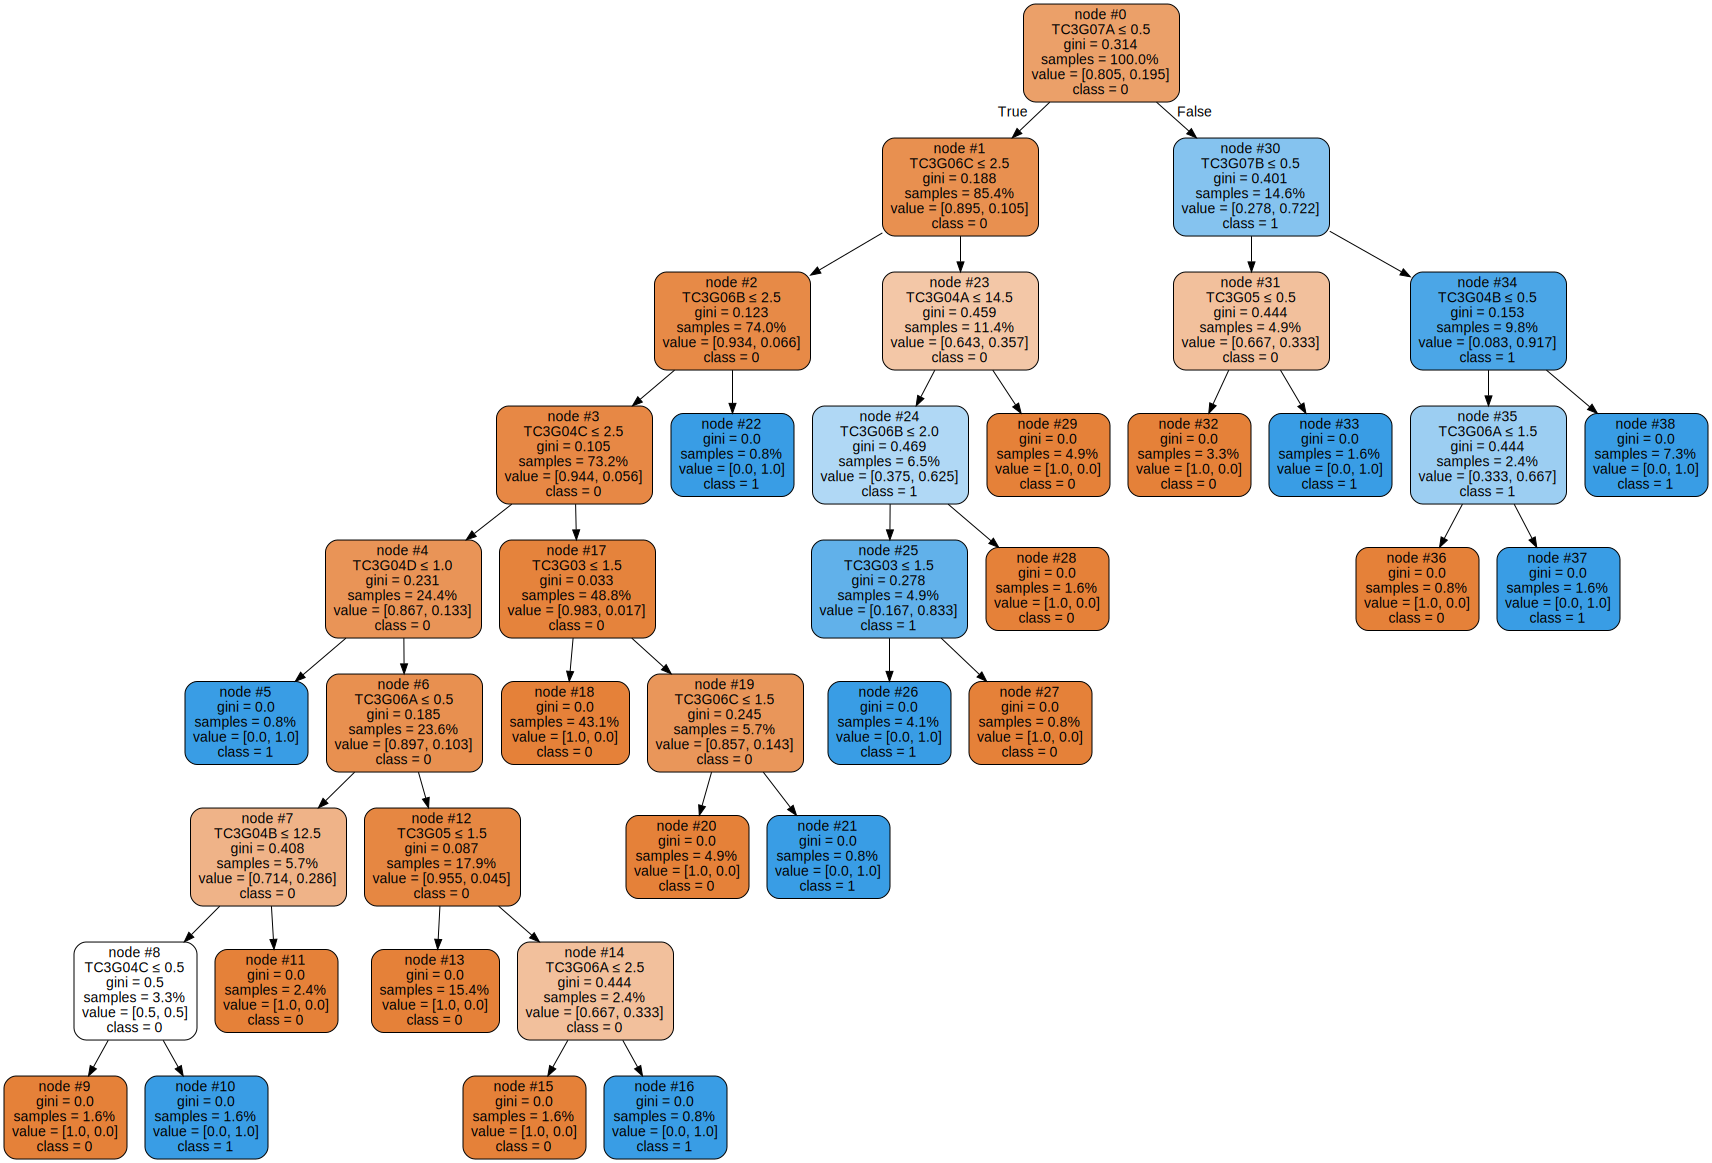

In [192]:
dot_data = export_graphviz( 
         clf, 
         out_file=None,
         feature_names=Talis2018_1.drop('TC3G07C',axis=1).columns,
         class_names=['0','1', '2','3','4'],  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

In [193]:
# Renderizando a árvore de forma interativa:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

# feature matrix
X,y = Talis2018_1.drop('TC3G07C',axis=1),Talis2018_1['TC3G07C']

# feature labels
features_label = Talis2018_1.drop('TC3G07C',axis=1).columns

# class label
class_label = ['0','1', '2','3','4']


def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X, y)
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,10,20,30]
   , min_samples_split=(1,5)
   , min_samples_leaf=(1,5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


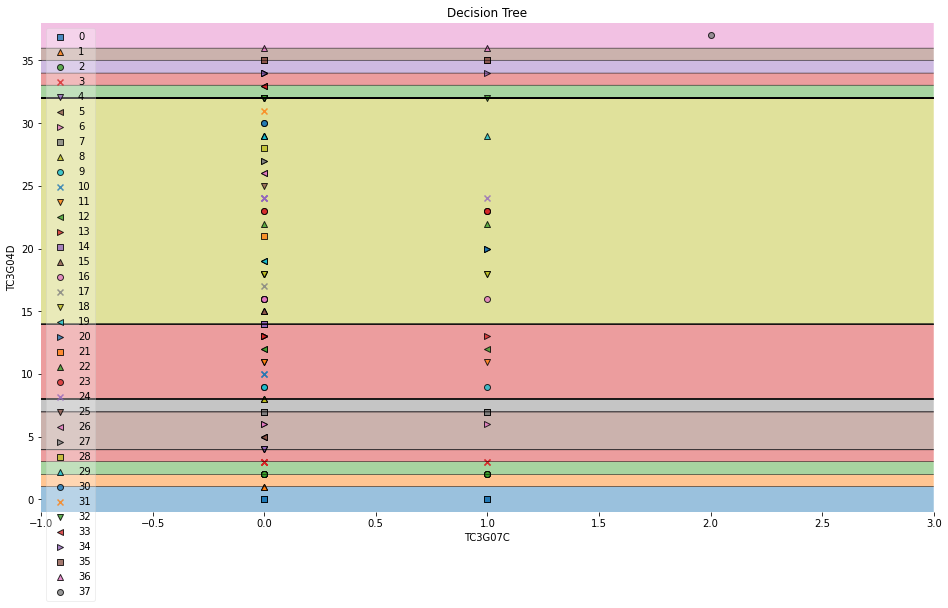

In [194]:
# Visualizando as fronteiras criadas pela arvore:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

def visualize_fronteiras(msamples_split,max_depth):
    X = Talis2018_1[['TC3G07C','TC3G04D']].values
    y = Talis2018_1.TC3G04D.values
    clf = DecisionTreeClassifier(min_samples_split=msamples_split,max_depth=max_depth)
    tree = clf.fit(X, y)

    plt.figure(figsize=(16,9))
    plot_decision_regions(X, y, clf=tree, legend=2)

    plt.xlabel('TC3G07C')
    plt.ylabel('TC3G04D')
    plt.title('Decision Tree')
    plt.show()

# Chamando a função criada anteriormente:

visualize_fronteiras(10,max_depth=8)

In [195]:
# Navegando na estrutura da arvore de decisão:
estimator = DecisionTreeClassifier(max_depth=3,min_samples_split=2,min_samples_leaf=2)
estimator.fit(X, y)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

print("Número de nós: {}".format(n_nodes))

Número de nós: 15


In [196]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("\nA arvore binária tem %s nós e a seguinte estrutura: \n"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snó=%s (nó folha)." % (node_depth[i] * "\t", i))
    else:
        print("%snó=%s (nó teste): vai para o nó %s se o valor do atributo %s <= %s \n se não, vai para o "
              "nó %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 Talis2018_1.columns[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))


A arvore binária tem 15 nós e a seguinte estrutura: 

nó=0 (nó teste): vai para o nó 1 se o valor do atributo TC3G07A <= 0.5 
 se não, vai para o nó 8.
	nó=1 (nó teste): vai para o nó 2 se o valor do atributo TC3G06C <= 2.5 
 se não, vai para o nó 5.
		nó=2 (nó teste): vai para o nó 3 se o valor do atributo TC3G07B <= 0.5 
 se não, vai para o nó 4.
			nó=3 (nó folha).
			nó=4 (nó folha).
		nó=5 (nó teste): vai para o nó 6 se o valor do atributo TC3G04A <= 16.5 
 se não, vai para o nó 7.
			nó=6 (nó folha).
			nó=7 (nó folha).
	nó=8 (nó teste): vai para o nó 9 se o valor do atributo TC3G04C <= 17.5 
 se não, vai para o nó 12.
		nó=9 (nó teste): vai para o nó 10 se o valor do atributo TC3G06C <= 0.5 
 se não, vai para o nó 11.
			nó=10 (nó folha).
			nó=11 (nó folha).
		nó=12 (nó teste): vai para o nó 13 se o valor do atributo TC3G06B <= 1.5 
 se não, vai para o nó 14.
			nó=13 (nó folha).
			nó=14 (nó folha).


In [197]:
def extrai_regras(sample_id):
    node_indicator = estimator.decision_path(X)

    leave_id = estimator.apply(X)

    #sample_id = sample
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]

    print('\nFeatures usadas para predizer a amostra %s' % (sample_id))

    for f,v in zip(Talis2018_1.columns,X.iloc[sample_id].values):
        print('%s = %s'%(f,v))

    print('\n')      
    for node_id in node_index:
        if leave_id[sample_id] == node_id:
            continue

        if (X.iloc[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("id do nó de decisão %s : (atributo %s com valor = %s %s %s)"
              % (node_id,
                 Talis2018_1.columns[feature[node_id]],
                 X.iloc[sample_id, feature[node_id]],
                 threshold_sign,
                 threshold[node_id]))
        
    pred =estimator.predict(X.iloc[sample_id].values.reshape(1, -1))
    print(pred) 
    print("\tClasse => %s" %pred)

In [198]:
extrai_regras(2)


Features usadas para predizer a amostra 2
TC3G01 = 1
TC3G03 = 1
TC3G04A = 11
TC3G04B = 12
TC3G04C = 0
TC3G04D = 14
TC3G04E = 2
TC3G05 = 0
TC3G06A = 1
TC3G06B = 0
TC3G06C = 0
TC3G07A = 0
TC3G07B = 1
TC3G07C = 1


id do nó de decisão 0 : (atributo TC3G07A com valor = 0 <= 0.5)
id do nó de decisão 1 : (atributo TC3G06C com valor = 0 <= 2.5)
id do nó de decisão 2 : (atributo TC3G07B com valor = 1 > 0.5)
[0]
	Classe => [0]


In [199]:
extrai_regras(7)


Features usadas para predizer a amostra 7
TC3G01 = 1
TC3G03 = 1
TC3G04A = 1
TC3G04B = 12
TC3G04C = 22
TC3G04D = 3
TC3G04E = 13
TC3G05 = 0
TC3G06A = 3
TC3G06B = 3
TC3G06C = 3
TC3G07A = 1
TC3G07B = 1
TC3G07C = 1


id do nó de decisão 0 : (atributo TC3G07A com valor = 1 > 0.5)
id do nó de decisão 8 : (atributo TC3G04C com valor = 22 > 17.5)
id do nó de decisão 12 : (atributo TC3G06B com valor = 3 > 1.5)
[1]
	Classe => [1]


In [201]:
# instalando o pandas profiling
!pip3 install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=93b9d6cf99c82f5019a79d1be4d7c6d97731e953dead9397cfdcca7f656a0f81
  Stored in directory: /tmp/pip-ephem-wheel-cache-if6ywxhu/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [202]:
# import o ProfileReport
from pandas_profiling import ProfileReport

In [203]:
# executando o profile
profile = ProfileReport(Talis2018_1, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})

In [204]:
profile

In [205]:
# salvando o relatório no disco
profile.to_file(output_file="Relatorio01.html")

In [206]:
#Interpretando o valor de ρ

    #0.9 a 1 positivo ou negativo indica uma correlação muito forte.
    #0.7 a 0.9 positivo ou negativo indica uma correlação forte.
    #0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
    #0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
    #0 a 0.3 positivo ou negativo indica uma correlação desprezível.